In [1]:
# data => banknotes.csv

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('banknotes.csv')
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [7]:
df.shape

(1372, 5)

In [9]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [11]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [13]:
# separate input and output

x = df.drop('Class', axis = 1)

y = df['Class']

In [15]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

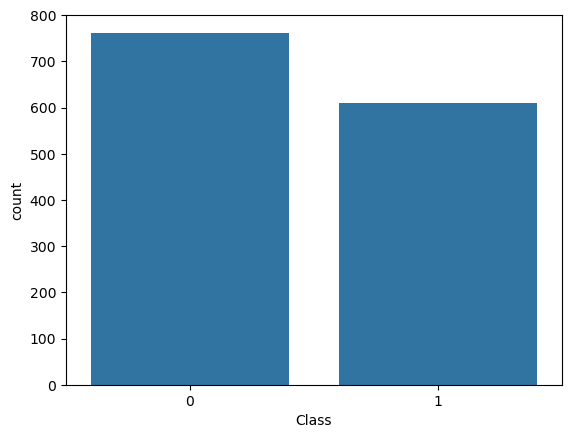

In [17]:
sns.countplot(x = y);

In [19]:
# cross validation

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   random_state=0)

In [23]:
x_train.shape, y_train.shape

((1029, 4), (1029,))

In [25]:
# Build the model

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state= 0,
                            criterion= 'gini')
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [27]:
# Evaluate

In [29]:
y_pred = dt.predict(x_test)

In [31]:
pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

,actual,predicted
1023,1,1
642,0,0
1196,1,1
31,0,0
253,0,0
...,...,...
866,1,1
361,0,0
703,0,0
328,0,0


In [33]:
# confusion matrix

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

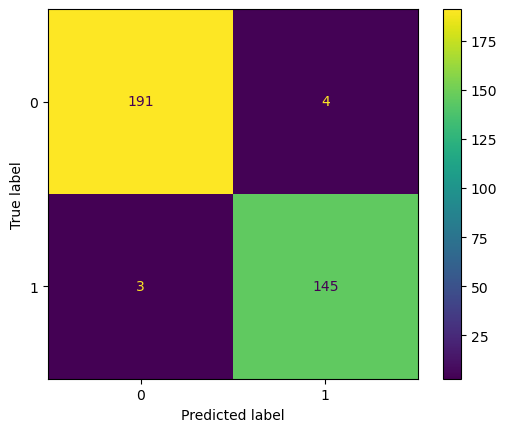

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [39]:
# classfication report 

In [41]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [45]:
# accuracy score

In [49]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [53]:
# visualize the tree

In [55]:
from sklearn.tree import plot_tree

In [59]:
import matplotlib.pyplot as plt

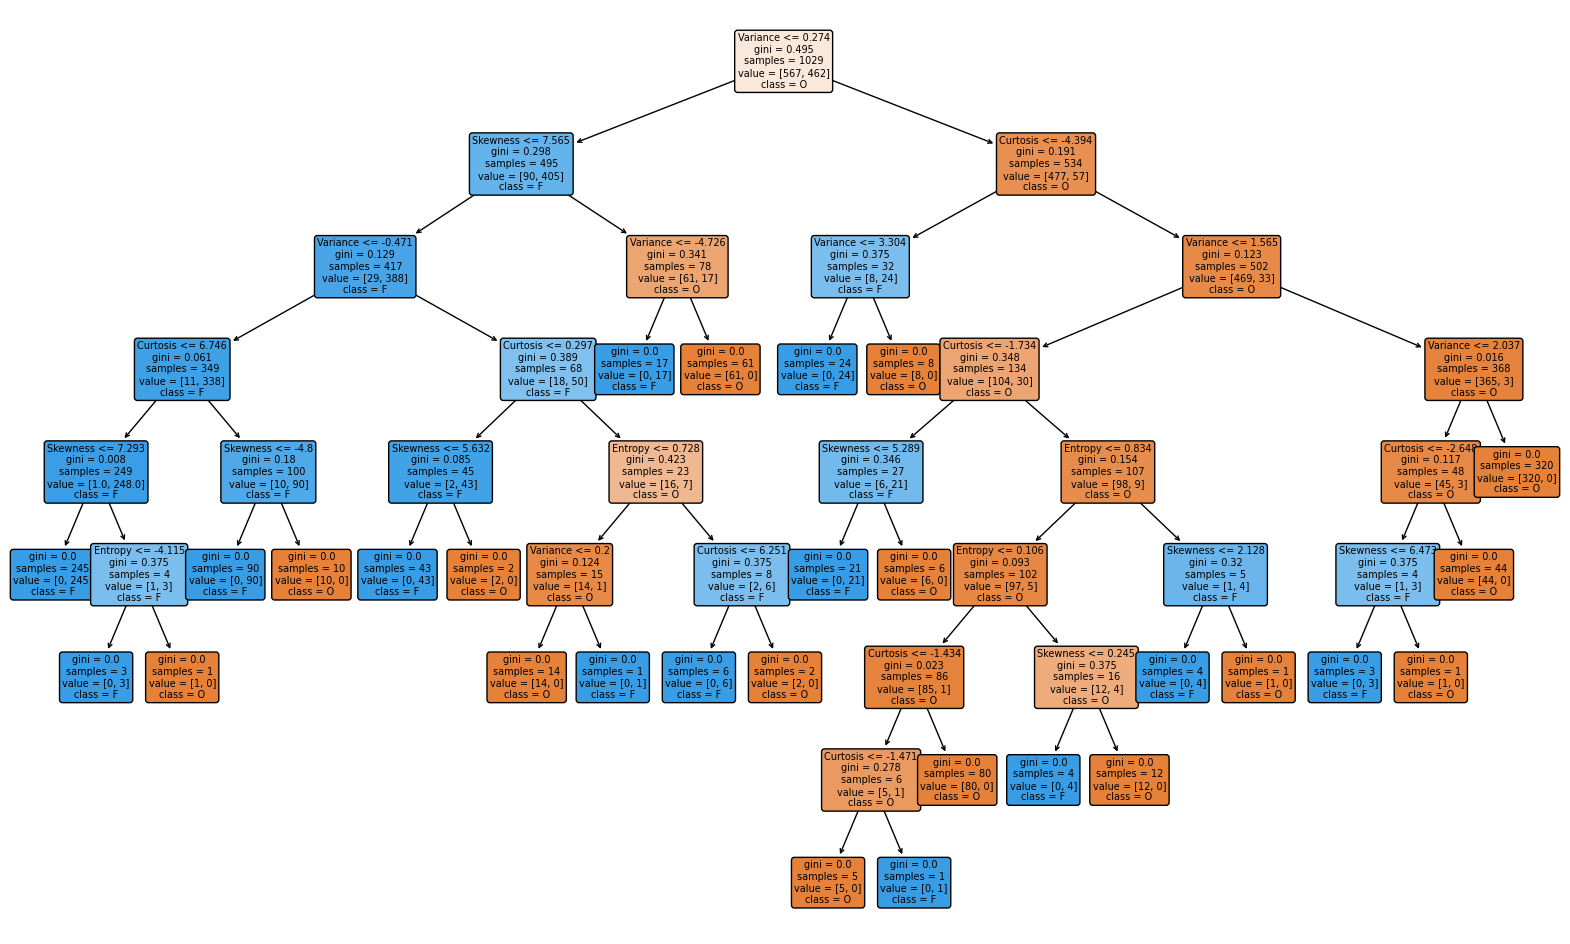

In [65]:
plt.figure(figsize=(20,12))

plot_tree(dt, rounded= True, feature_names= x.columns,
         fontsize= 7, class_names= ['O', 'F'], filled= True);

In [69]:
imp = dt.feature_importances_
imp

array([0.62095248, 0.21106862, 0.14189251, 0.02608639])

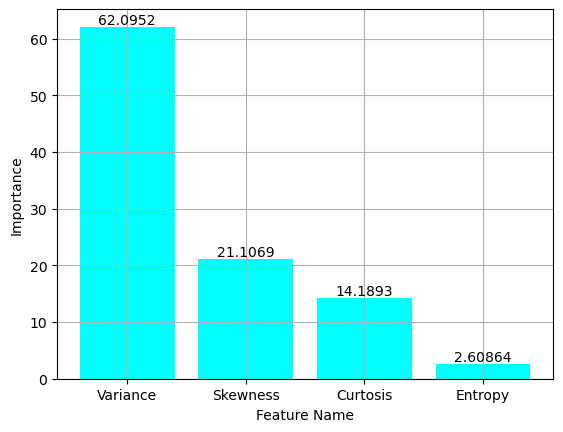

In [85]:
plt.xlabel('Feature Name')
plt.ylabel('Importance')
cont = plt.bar(x.columns, imp * 100, color = 'cyan')
plt.bar_label(cont)
plt.grid();